<a href="https://colab.research.google.com/github/bhumong/ai-bootcamp/blob/main/supervised-learning/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction
Dalam konteks churn prediction (prediksi pelanggan yang akan meninggalkan layanan), label 1 dan 0 digunakan untuk menunjukkan apakah pelanggan tertentu diprediksi akan churn (meninggalkan layanan) atau tidak.

Label 1 biasanya digunakan untuk menunjukkan bahwa pelanggan tersebut diprediksi akan churn, sedangkan label 0 digunakan untuk menunjukkan bahwa pelanggan tersebut diprediksi tidak akan churn.

Dalam dataset churn prediction, label tersebut biasanya dihasilkan dari hasil pengamatan historis, seperti apakah pelanggan telah meninggalkan layanan di masa lalu, apakah mereka memiliki riwayat pembayaran yang buruk, atau apakah mereka telah mengajukan permintaan untuk membatalkan layanan. Kemudian, label-label ini digunakan untuk melatih model untuk memprediksi perilaku churn di masa depan.

## Telco Customer Churn

### Import library

In [ ]:
!pip install numpy matplotlib pandas scikit-learn

  Using cached scikit_learn-1.6.1-cp310-cp310-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached scipy-1.15.1-cp310-cp310-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 1.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/24.8 MB 943.9 kB/s eta 0:00:20

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'sklearn'

### Import Data & Pre-processing

In [ ]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.SeniorCitizen.unique()

array([0, 1])

In [ ]:
df.drop(columns=['customerID'], inplace=True)

In [ ]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [ ]:
# label encoding fitur churn
# no = 0 , yes = 1

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['Churn'] = le.fit_transform(df['Churn'])

In [ ]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
# df.drop(columns=['gender', 'SeniorCitizen'], inplace=True)

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
          'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport', 'StreamingTV',
          'StreamingMovies',	'Contract',	'PaperlessBilling',	'PaymentMethod']

In [ ]:
df[encode] = df[encode].apply(le.fit_transform)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.5,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.9,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.6,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
# prompt: cek setiap baris pada kolom TotalCharges dimana yang bukan float, tampilkan

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
from sklearn import preprocessing

warnings.filterwarnings('ignore')

# Check for non-float values in 'TotalCharges' column
for index, value in df['TotalCharges'].items():
    try:
        float(value)
    except ValueError:
        print(f"Row {index}: '{value}' is not a float")

Row 488: ' ' is not a float
Row 753: ' ' is not a float
Row 936: ' ' is not a float
Row 1082: ' ' is not a float
Row 1340: ' ' is not a float
Row 3331: ' ' is not a float
Row 3826: ' ' is not a float
Row 4380: ' ' is not a float
Row 5218: ' ' is not a float
Row 6670: ' ' is not a float
Row 6754: ' ' is not a float


In [ ]:
df[df['TotalCharges'] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,1,1,0,0,1,0,2,0,2,2,2,0,2,1,0,52.55,,0
753,1,0,0,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.25,,0
936,0,0,1,1,0,1,0,0,2,2,2,0,2,2,2,0,3,80.85,,0
1082,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.75,,0
1340,0,0,1,1,0,0,1,0,2,2,2,2,2,0,2,0,1,56.05,,0
3331,1,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,19.85,,0
3826,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.35,,0
4380,0,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.00,,0
5218,1,0,1,1,0,1,0,2,1,1,1,1,1,1,1,1,3,19.70,,0
6670,0,0,1,1,0,1,2,0,0,2,2,2,2,0,2,0,3,73.35,,0


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df[df.isna().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,1,1,0,0,1,0,2,0,2,2,2,0,2,1,0,52.55,NaN,0
753,1,0,0,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.25,NaN,0
936,0,0,1,1,0,1,0,0,2,2,2,0,2,2,2,0,3,80.85,NaN,0
1082,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.75,NaN,0
1340,0,0,1,1,0,0,1,0,2,2,2,2,2,0,2,0,1,56.05,NaN,0
3331,1,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,19.85,NaN,0
3826,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.35,NaN,0
4380,0,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.00,NaN,0
5218,1,0,1,1,0,1,0,2,1,1,1,1,1,1,1,1,3,19.70,NaN,0
6670,0,0,1,1,0,1,2,0,0,2,2,2,2,0,2,0,3,73.35,NaN,0


In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
# proporsi kolom churn

df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


<Axes: ylabel='count'>

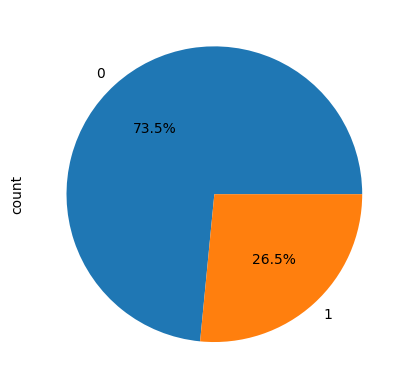

In [ ]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


### MODEL BUILDING (modeling)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [ ]:
# tentukan data X & y
X = df.drop(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn'])
y = df['Churn'].values

In [ ]:
# set data training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,1336.800000
1623,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,5129.450000
6074,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,23.450000
1362,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,237.950000
6754,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90,2283.300441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.000000
5191,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.300000
5226,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,306.050000
5390,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.150000


In [ ]:
y_test

array([1, 0, 0, ..., 0, 0, 1])

K-Nearest Neighbors (KNN)

In [ ]:
#modelling
from sklearn.neighbors import KNeighborsClassifier

model1 =  KNeighborsClassifier()
model1.fit(X_train, y_train)

prediksi_model1 = model1.predict(X_test)

print('Akurasi KNN adalah:', "{:.2%}".format(metrics.accuracy_score(y_test, prediksi_model1)))
print(metrics.classification_report(y_test, prediksi_model1))

Akurasi KNN adalah: 77.79%
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1036
           1       0.60      0.48      0.53       373

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



Naive Bayes


In [ ]:
#modelling

from sklearn.naive_bayes import GaussianNB

model2 =  GaussianNB()
model2.fit(X_train, y_train)

prediksi_model2 = model2.predict(X_test)

print('Akurasi Naive Bayes adalah:', "{:.2%}".format(metrics.accuracy_score(y_test, prediksi_model2)))
print(metrics.classification_report(y_test, prediksi_model2))

Akurasi Naive Bayes adalah: 75.73%
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



In [ ]:
#modelling decision tree

from sklearn.tree import DecisionTreeClassifier

model3 =  DecisionTreeClassifier()
model3.fit(X_train, y_train)

prediksi_model3 = model3.predict(X_test)

print('Akurasi Naive Bayes adalah:', "{:.2%}".format(metrics.accuracy_score(y_test, prediksi_model3)))
print(metrics.classification_report(y_test, prediksi_model3))

Akurasi Naive Bayes adalah: 73.67%
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1036
           1       0.50      0.51      0.50       373

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409



In [ ]:
#modelling logistic

from sklearn.linear_model import LogisticRegression

model4 =  LogisticRegression()
model4.fit(X_train, y_train)

prediksi_model4 = model4.predict(X_test)

print('Akurasi adalah:', "{:.2%}".format(metrics.accuracy_score(y_test, prediksi_model4)))
print(metrics.classification_report(y_test, prediksi_model4))

Akurasi adalah: 81.41%
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.67      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model5 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model5.fit(X_train, y_train)

prediksi_model5 = model5.predict(X_test)

print('Akurasi adalah:', "{:.2%}".format(metrics.accuracy_score(y_test, prediksi_model5)))
print(metrics.classification_report(y_test, prediksi_model5))

Akurasi adalah: 80.70%
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1036
           1       0.68      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier()
model6.fit(X_train, y_train)

prediksi_model6 = model6.predict(X_test)

print('Akurasi adalah:', "{:.2%}".format(metrics.accuracy_score(y_test, prediksi_model6)))
print(metrics.classification_report(y_test, prediksi_model6))

Akurasi adalah: 79.49%
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



Hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
   'n_estimators': [10, 20, 50, 75, 100],
   'criterion': ["gini", "entropy", "log_loss"],
   'max_depth': [1, 5, 10, 20, 30]
   }

estimator = RandomForestClassifier(n_estimators=10)

model_hp = GridSearchCV(estimator, param_grid, cv=5)
model_hp.fit(X_train, y_train)

prediksi_model_hp = model_hp.predict(X_test)

print('Akurasi adalah:', "{:.2%}".format(metrics.accuracy_score(y_test, prediksi_model_hp)))
print(metrics.classification_report(y_test, prediksi_model_hp))

Akurasi adalah: 80.08%
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.68      0.51      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [ ]:
model_hp.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}

imbalance data handling

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE(random_state=42)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_over))

Original dataset shape Counter({0: 4138, 1: 1496})
Resampled dataset shape Counter({0: 4138, 1: 4138})


In [ ]:
X_train_over

,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,21,1,0,0,2,0,2,0,0,2,1,0,3,64.850000,1336.800000
1,54,1,2,1,0,2,0,0,2,2,2,1,0,97.200000,5129.450000
2,1,0,1,0,0,0,0,0,0,0,0,1,2,23.450000,23.450000
3,4,1,0,1,0,0,0,0,0,0,0,1,2,70.200000,237.950000
4,0,1,2,0,2,2,0,2,0,0,2,1,0,61.900000,2283.300441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271,5,1,0,1,0,0,0,0,2,1,0,1,1,88.121375,451.834304
8272,44,1,0,1,0,0,1,0,0,2,0,1,1,90.725171,4048.457431
8273,35,1,2,1,0,1,1,0,2,1,0,1,2,101.603909,3547.522160
8274,44,0,0,1,0,0,0,1,0,0,0,0,1,20.891535,933.033556


In [ ]:
#modelling logistic

from sklearn.linear_model import LogisticRegression

model4 =  LogisticRegression()
model4.fit(X_train_over, y_train_over)

prediksi_model4 = model4.predict(X_test)

print('Akurasi adalah:', "{:.2%}".format(metrics.accuracy_score(y_test, prediksi_model4)))
print(metrics.classification_report(y_test, prediksi_model4))

Akurasi adalah: 75.73%
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.78      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier()
model6.fit(X_train_over, y_train_over)

prediksi_model6 = model6.predict(X_test)

print('Akurasi adalah:', "{:.2%}".format(metrics.accuracy_score(y_test, prediksi_model6)))
print(metrics.classification_report(y_test, prediksi_model6))

Akurasi adalah: 77.79%
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1036
           1       0.58      0.55      0.57       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.78      0.78      1409



In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model5 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model5.fit(X_train_over, y_train_over)

prediksi_model5 = model5.predict(X_test)

print('Akurasi adalah:', "{:.2%}".format(metrics.accuracy_score(y_test, prediksi_model5)))
print(metrics.classification_report(y_test, prediksi_model5))

Akurasi adalah: 78.50%
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1036
           1       0.58      0.68      0.62       373

    accuracy                           0.78      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.78      0.79      1409



In [ ]:
# under sampling

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

print('Original dataset shape %s' % Counter(y_train))
rs = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rs.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_under))

Original dataset shape Counter({0: 4138, 1: 1496})
Resampled dataset shape Counter({0: 1496, 1: 1496})


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model5 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model5.fit(X_train_under, y_train_under)

prediksi_model5 = model5.predict(X_test)

print('Akurasi adalah:', "{:.2%}".format(metrics.accuracy_score(y_test, prediksi_model5)))
print(metrics.classification_report(y_test, prediksi_model5))

Akurasi adalah: 74.02%
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1036
           1       0.51      0.79      0.62       373

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [ ]:
# under sampling

from collections import Counter
from imblearn.combine import SMOTEENN

print('Original dataset shape %s' % Counter(y_train))
smt = SMOTEENN(random_state=42)
X_train_combine, y_train_combine = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_combine))

Original dataset shape Counter({0: 4138, 1: 1496})
Resampled dataset shape Counter({1: 2444, 0: 2103})


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model5 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model5.fit(X_train_combine, y_train_combine)

prediksi_model5 = model5.predict(X_test)

print('Akurasi adalah:', "{:.2%}".format(metrics.accuracy_score(y_test, prediksi_model5)))
print(metrics.classification_report(y_test, prediksi_model5))

Akurasi adalah: 76.30%
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1036
           1       0.54      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.80      0.76      0.77      1409



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier()
model6.fit(X_train_combine, y_train_combine)

prediksi_model6 = model6.predict(X_test)

print('Akurasi adalah:', "{:.2%}".format(metrics.accuracy_score(y_test, prediksi_model6)))
print(metrics.classification_report(y_test, prediksi_model6))

Akurasi adalah: 76.37%
              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1036
           1       0.54      0.78      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



# Balance data secara manual

In [ ]:
df.Churn.value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
label0 = df[df.Churn == 0].sample(1869)
label1 = df[df.Churn == 1].sample(1869)

df_combine = pd.concat([label0, label1], axis=0)
df_combine.Churn.value_counts()

,count
Churn,
0,1869
1,1869


In [ ]:
# tentukan data X & y
X = df_combine.drop(columns=['Churn'])
y = df_combine['Churn'].values

# set data training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier()
model6.fit(X_train, y_train)

prediksi_model6 = model6.predict(X_test)

print('Akurasi adalah:', "{:.2%}".format(metrics.accuracy_score(y_test, prediksi_model6)))
print(metrics.classification_report(y_test, prediksi_model6))

Akurasi adalah: 73.66%
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       379
           1       0.73      0.73      0.73       369

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



# Save & Load

In [ ]:
import joblib

file_name = 'model6.pkl'
joblib.dump(model6, file_name)

['model6.pkl']

In [ ]:
joblib_model = joblib.load("/content/model6.pkl")

In [ ]:
X_test.sample(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2029,1,0,1,0,67,1,0,1,2,2,0,0,0,2,1,1,1,90.6,6056.15


In [ ]:
joblib_model.predict(X_test.sample(1))

array([0])

# Kesimpulan

Kesimpulan :

- Model KNN yang tertinggi dari model yang lain
- maka nanti di deployment model KNN menjadi API yang diteruskan ke sistem

In [ ]:
model1

KNeighborsClassifier()

In [ ]:
hasil_prediksi_2025 = model1.predict(X_test)

In [ ]:
hasil_prediksi_2025

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,24.80,24.80
2715,1,0,0,0,41,1,2,2,1,1,1,1,1,1,0,1,0,25.25,996.45
3825,0,0,1,1,52,1,0,2,1,1,1,1,1,1,2,0,3,19.35,1031.70
1807,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,2,76.35,76.35
132,1,0,0,0,67,1,0,0,0,0,0,2,0,0,2,0,0,50.55,3260.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0,0,1,0,64,1,0,0,0,2,2,2,0,2,2,1,3,68.30,4378.80
315,1,0,1,1,51,1,2,1,2,2,0,2,2,2,1,0,1,110.05,5686.40
2439,1,0,1,1,17,1,0,2,1,1,1,1,1,1,1,0,0,19.90,329.75
5002,0,0,1,1,69,0,1,0,2,0,2,0,0,2,2,1,1,43.95,2960.10


In [ ]:
X_test['hasil_prediksi_2025'] = hasil_prediksi_2025

In [ ]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,hasil_prediksi_2025
185,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,24.80,24.80,1
2715,1,0,0,0,41,1,2,2,1,1,1,1,1,1,0,1,0,25.25,996.45,0
3825,0,0,1,1,52,1,0,2,1,1,1,1,1,1,2,0,3,19.35,1031.70,0
1807,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,2,76.35,76.35,1
132,1,0,0,0,67,1,0,0,0,0,0,2,0,0,2,0,0,50.55,3260.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0,0,1,0,64,1,0,0,0,2,2,2,0,2,2,1,3,68.30,4378.80,0
315,1,0,1,1,51,1,2,1,2,2,0,2,2,2,1,0,1,110.05,5686.40,0
2439,1,0,1,1,17,1,0,2,1,1,1,1,1,1,1,0,0,19.90,329.75,0
5002,0,0,1,1,69,0,1,0,2,0,2,0,0,2,2,1,1,43.95,2960.10,0


In [ ]:
# kesimpulan

X_test['hasil_prediksi_2025'].value_counts()

,count
hasil_prediksi_2025,
0,1109
1,300


<Axes: xlabel='hasil_prediksi_2025'>

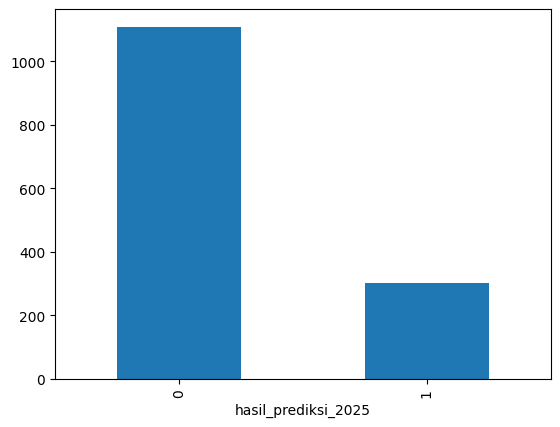

In [ ]:
X_test['hasil_prediksi_2025'].value_counts().plot(kind='bar')

**insight bisnis**

- user pada label 1 bisa kita kontak dan kita tanya, kenapa exit dari layanan kita ?
- user pada label 1 bisa kita ajak lagi
- user pada label 0 bisa kita beri promosi atau bonus karena sudah loyal